In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

/home/igor/houseprice_prediction/venv/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


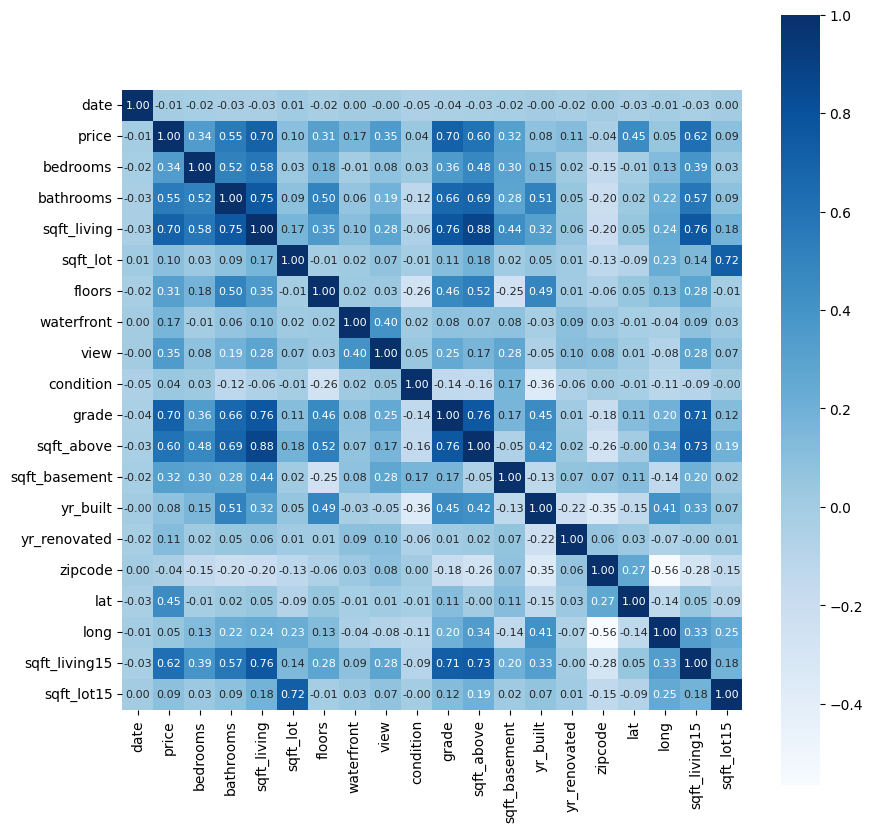

In [41]:
df = pd.read_csv("./kc_house_data.csv")
df = df.drop(columns=["id"])

# Após a avaliação do gráfico de resíduos, foi verificado que ocorria um padrão de leque
# utilizei esta transformação logarítmica para tentar aumentar a constância da variância dos erros.
df["price"] = np.log1p(df["price"])

# Tratamento de datas
df["date"] = pd.to_datetime(df["date"])
oldest_date = df["date"].min()
df["date"] = (df["date"] - oldest_date).dt.days

# Cálculo do VIF para detectar colinearidade entre variáveis
vif = pd.DataFrame()
vif["features"] = df.columns
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

y = df["price"]
xs = df[["sqft_living", "view", "lat"]]

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cbar= True, square=True, annot=True, cmap='Blues', fmt=".2f", annot_kws={'size': 8})
plt.show()


In [42]:
# Treino do modelo sem colinearidades significativas
X_train, X_test, y_train, y_test = train_test_split(xs, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

tree_model = DecisionTreeRegressor(max_depth=10)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

R-squared train: 0.68


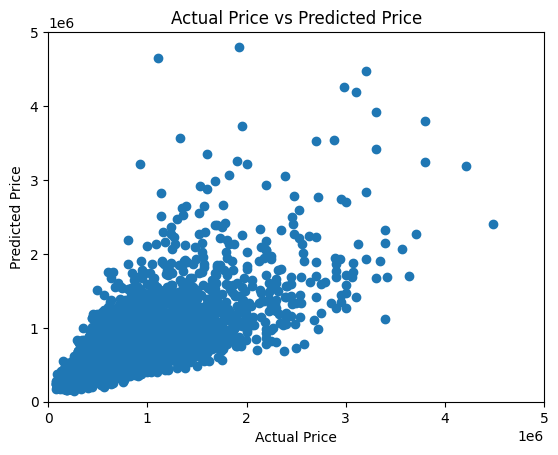

R-squared test: 0.67


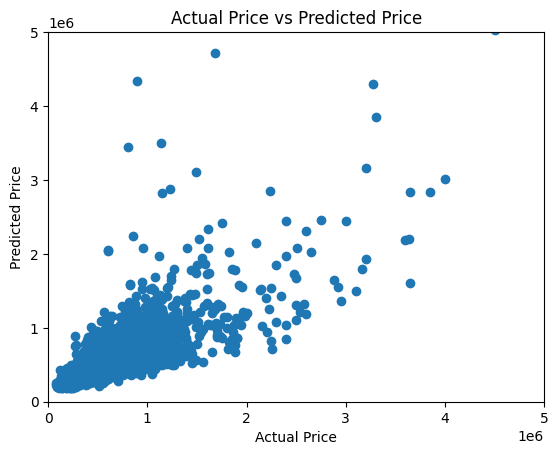

In [43]:
# Avaliação Regressão Linear
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print(f"R-squared train: {r2_train:.2f}")
plt.scatter(np.expm1(y_train), np.expm1(y_train_pred))
plt.xlim(0, 5e6)
plt.ylim(0, 5e6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

print(f"R-squared test: {r2:.2f}")
plt.scatter(np.expm1(y_test), np.expm1(y_pred))
plt.xlim(0, 5e6)
plt.ylim(0, 5e6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

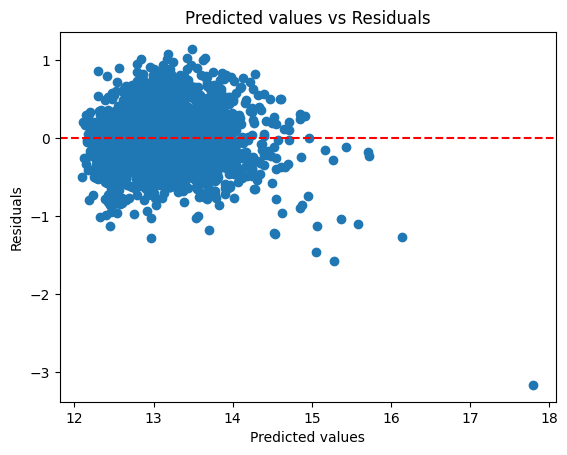

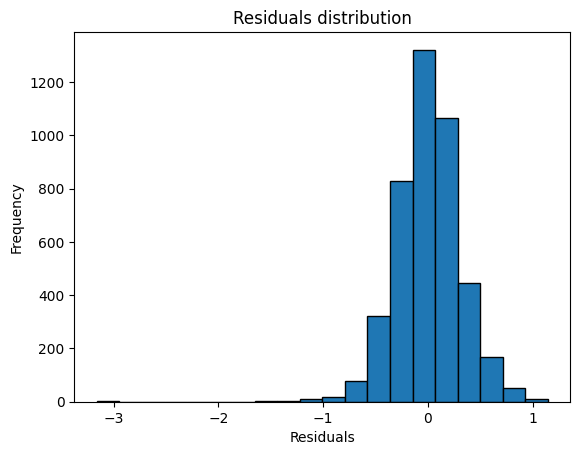

In [ ]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")
plt.show()

plt.hist(residuals, bins=20, edgecolor="black")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals distribution")
plt.show()

In [45]:
# Treino do modelo ignorando colinearidades
xs = df.drop(columns=["price"])
X_train, X_test, y_train, y_test = train_test_split(xs, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

R-squared train: 0.77


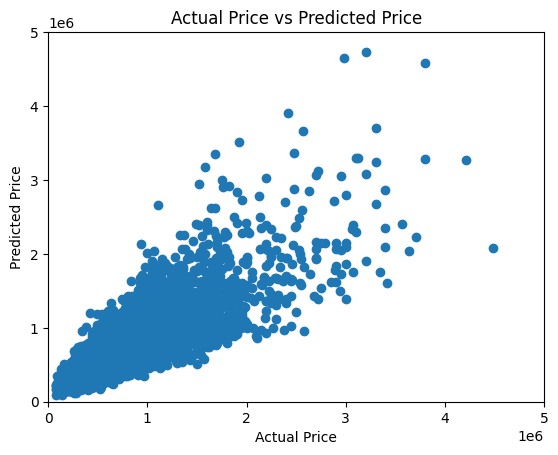

R-squared test: 0.77


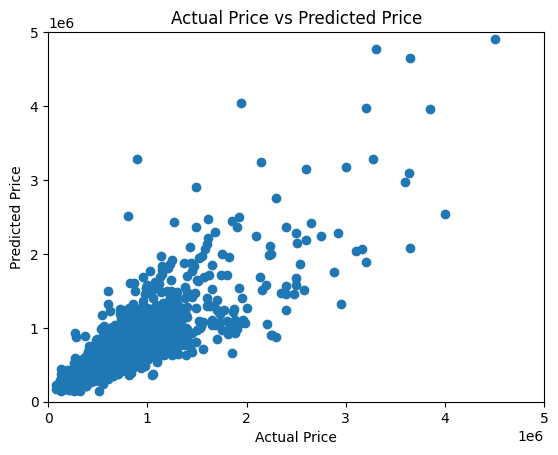

In [46]:
# Avaliação Regressão Linear
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

print(f"R-squared train: {r2_train:.2f}")
plt.scatter(np.expm1(y_train), np.expm1(y_train_pred))
plt.xlim(0, 5e6)
plt.ylim(0, 5e6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()


print(f"R-squared test: {r2:.2f}")
plt.scatter(np.expm1(y_test), np.expm1(y_pred))
plt.xlim(0, 5e6)
plt.ylim(0, 5e6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

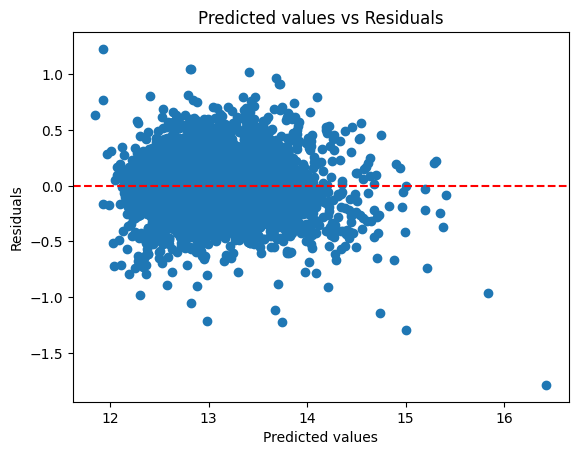

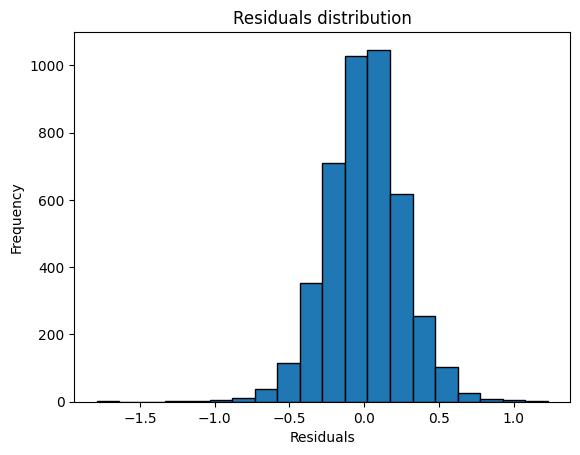

In [47]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")
plt.show()

plt.hist(residuals, bins=20, edgecolor="black")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals distribution")
plt.show()